In this project I'm performing EDA on Automobile Dataset.

Dataset contains 205 rows and 26 Features.

Questions Arising after looking at Dataset. Few of them are as follows:

- What is the Frequency of cars from various Manufacturers ?
- What kind of Fuel types are available ?
- What kind of various Fuel system we'll get to observe ?
- How many various body styles we would get to see in the Dataset ?
- Which features affect the price more prominently ?

Plus many questions arised while performing Analysis. Let us dive right into it and do some basic analysis and visualisations.

- Setting Path

In [1]:
path = "D:/Data Science/DS Prac/EDA/Project Datasets/Automobile_data/Project_4_Automobile data/"

- Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set()

- Reading table

In [12]:
auto = pd.read_table(path+"Automobile_data.txt", sep=",")
auto.shape

(205, 26)

- As the Dataset contains "?" values we nedd to convert them to NaN

In [13]:
auto = auto.convert_objects(convert_numeric=True)
auto.head()

C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


- Checking for columns containing Missing values

In [14]:
auto.isnull().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

- Milling out missing values by Average of respective columns.

In [15]:
auto_df = auto.fillna(auto.mean())
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


- As num-of-doors contain string we've to seperately replace "?" values by mode ,i.e, four

In [16]:
auto_df['num-of-doors'] = auto_df['num-of-doors'].replace(to_replace="?", value='four')

- Co-relation chart to check which features are closely related.

Text(0.5,1,'Co-relation chart')

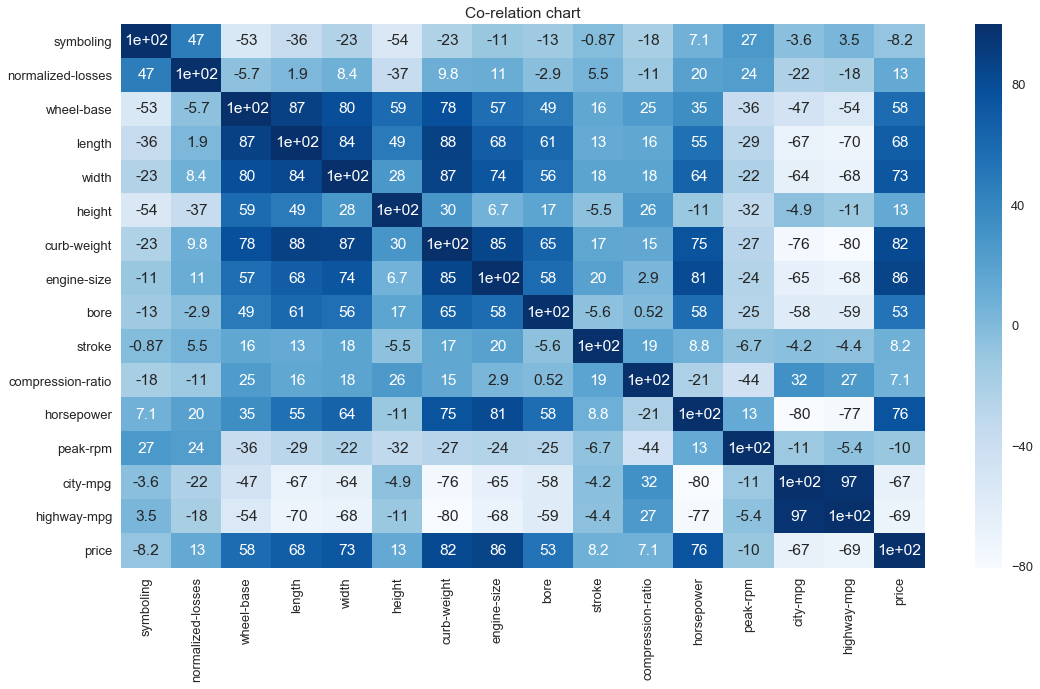

In [19]:
sns.set_context("talk")
plt.figure(figsize=(18,10))
corr = auto_df.corr()*100
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title("Co-relation chart")

- What is the Frequency of cars from various car manufacturers in the Dataset ?

We can see that Toyota has more number of cars, followed by Nissan and others.

Text(0.5,1,'Automobile Manufacturers')

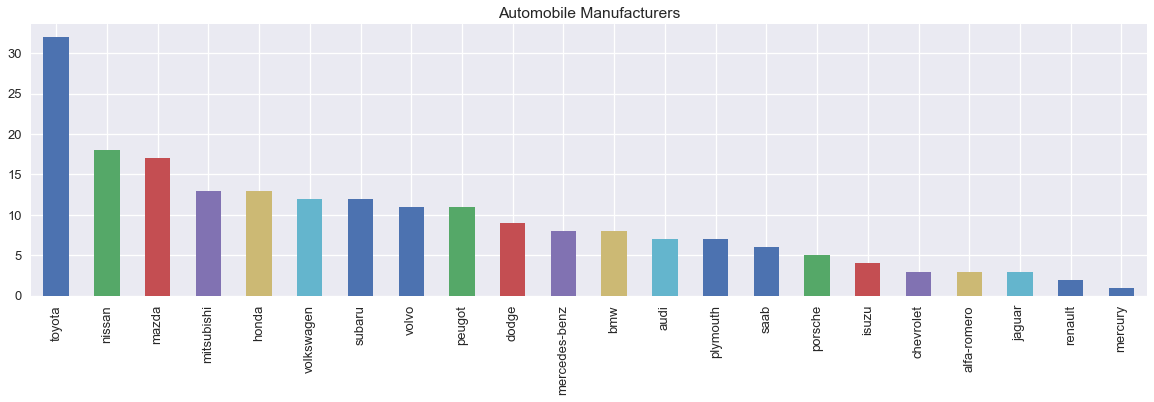

In [20]:
auto_df['make'].value_counts().plot(kind="bar", figsize=(20,5), grid=True)
plt.title("Automobile Manufacturers")

- What various fuel-types are available ?

So we've cars which are mostly (90.24%) running on Gas while Diesel cars are in 9.76%.  

Text(0.5,1,'Fuel Types')

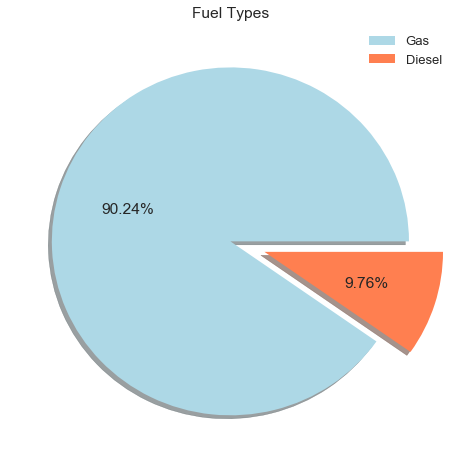

In [21]:
fuel_type = auto_df['fuel-type'].value_counts()
plt.figure(figsize=(8,8))
color = ["lightblue",'coral']
explode = [0,0.2]
label=['Gas','Diesel']
plt.pie(fuel_type, autopct="%1.2f%%", colors=color, explode=explode, shadow=True)
plt.legend(label)
plt.title("Fuel Types")

- What Aspiration are available ?

We've Standard aspirations in more amount than turbo.

Text(0.5,1,'Aspiration - Standard VS Turbo')

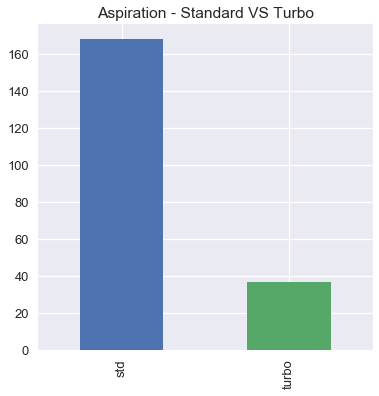

In [22]:
auto_df['aspiration'].value_counts().plot(kind="bar", grid=True, figsize=(6,6))
plt.title("Aspiration - Standard VS Turbo")

- What do we've in body styles ?

As from the figure (More to Less) below, we've Sedan, Hatchback, Wagon, Hardtop and Convertible cars.

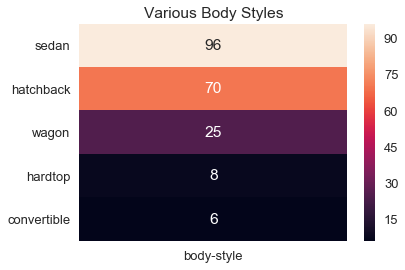

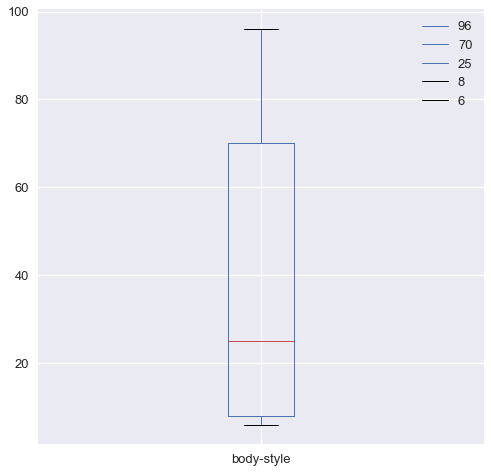

In [23]:
body_style = auto_df['body-style'].value_counts()
sns.heatmap(pd.DataFrame(body_style), annot=True)
plt.title("Various Body Styles")
plt.show()
plt.figure(figsize=(8,8))
pd.DataFrame(body_style).boxplot()
plt.legend(body_style)

- What is the frequency of cars with four doors ?

So we've 100+ cars with four doors.

Text(0.5,1,'Number of Doors')

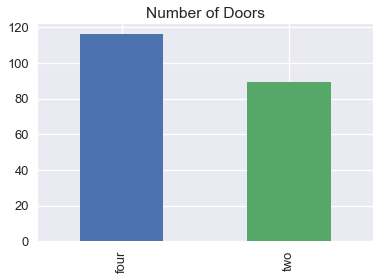

In [24]:
auto_df['num-of-doors'].value_counts().plot(kind="bar")
plt.title("Number of Doors")

- What various fuel system are available ?

We've MPFI (Multi Point Fuel Injection) cars in huge amount, followed by 2BBL (2 Barrel) systems and others.

Text(0.5,1,'Various Fuel Systems')

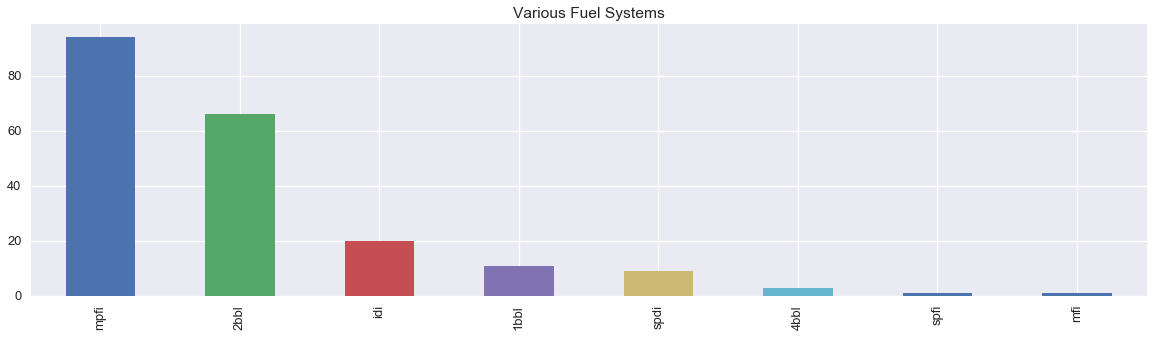

In [25]:
auto_df['fuel-system'].value_counts().plot(kind="bar", figsize=(20,5), grid=True)
plt.title('Various Fuel Systems')

- Frequency of Cars with cylinder count ?

We've cars with Four, six, five, eight, two, twelve and three cylinders. 

Text(0.5,1,'Number of Cylinders')

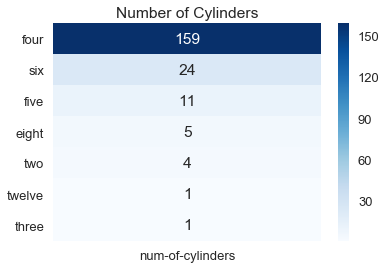

In [26]:
sns.heatmap(pd.DataFrame(auto_df['num-of-cylinders'].value_counts()), annot=True, fmt="d", cmap="Blues")
plt.title("Number of Cylinders")

- What data is describing us ?

We've cars with horsepower ranging from 48 to 288.

We've cars which gives Mileage of max. 54 MPG.

We've cars ranging from 5118 USD to 45400 USD.

In [27]:
auto_df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- What are the factors postively and negatively affecting Price ?

As we can see below that Increase in Curb weight, Horsepower unit, Engine Size and Width can drastically increase price while Decrease in highway/city MPG also increases Price.

Cars with high highway/city MPG are budget oriented Cars while Cars with low MPG are high on Price.

Text(0,0.5,'Horsepower')

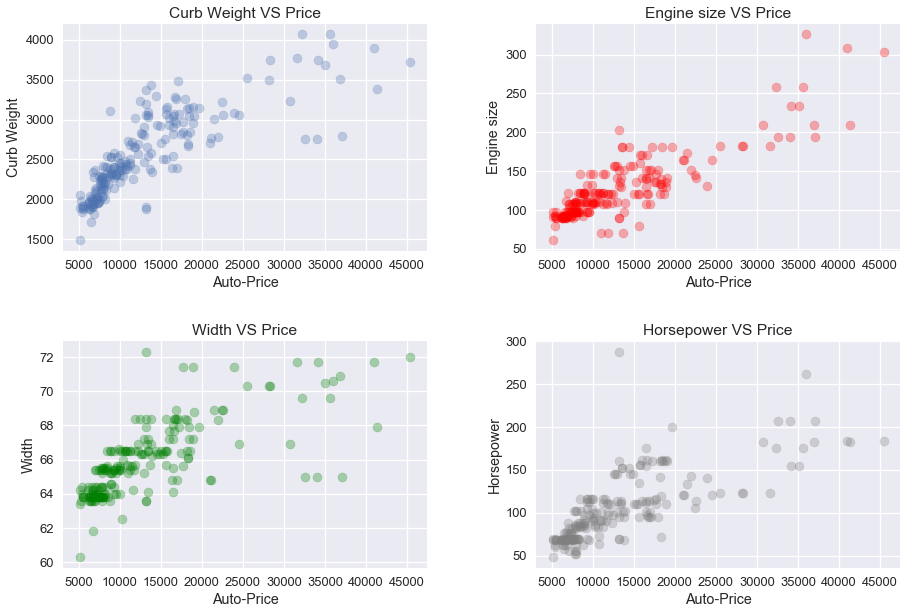

In [28]:
plt.figure(1, figsize=(15,10))
plt.subplot(2,2,1)
plt.subplots_adjust(wspace=0.3,hspace=0.4)
plt.scatter(auto_df.price, auto_df['curb-weight'], alpha=0.3)
plt.title("Curb Weight VS Price")
plt.xlabel("Auto-Price")
plt.ylabel("Curb Weight")

plt.subplot(2,2,2)
plt.scatter(auto_df.price, auto_df['engine-size'], alpha=0.3, color="r")
plt.title("Engine size VS Price")
plt.xlabel("Auto-Price")
plt.ylabel("Engine size")

plt.subplot(2,2,3)
plt.scatter(auto_df.price, auto_df['width'], alpha=0.3, color="g")
plt.title("Width VS Price")
plt.xlabel("Auto-Price")
plt.ylabel("Width")

plt.subplot(2,2,4)
plt.scatter(auto_df.price, auto_df['horsepower'], alpha=0.3, color="grey")
plt.title("Horsepower VS Price")
plt.xlabel("Auto-Price")
plt.ylabel("Horsepower")


Text(0.5,1,'MPG VS Price')

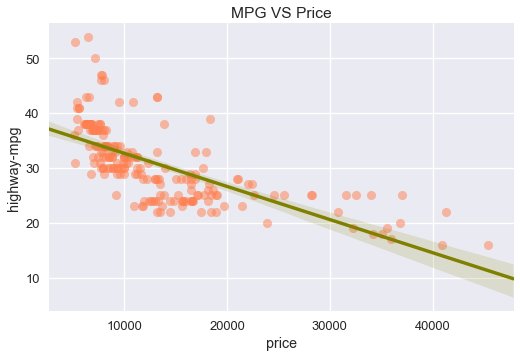

In [29]:
sns.lmplot(data=auto_df, x="price", y='highway-mpg', aspect=1.5, scatter_kws={"color":"coral","alpha":0.5}, line_kws={"color":"olive"})
plt.title("MPG VS Price")

- What trend in price do we get to see when MPG is below or equals 30 and Avg. price is more than equals to 10595 USD (Considering 50% of Described data) ?

Note: We've to consider MPG VS Price relation here. We know that Price increases when highway/city MPG decreases. This gives us idea that high tier cars give lesser mileage. Keeping that thing in mind I had set the condition of 50% of described data ,i.e, Highway MPG below or equals 30 and Price more than equals to 10595 USD.

We get to see that Jaguar cars have Avg. MPG of 18.33 and Avg. price goes upto 34600 USD. Similarly, Mercedes-benz cars have Avg. MPG of 21 and Avg. Price goes upto 33647 USD. While Isuzu and Honda's Avg. MPG is 29 and 28 respectively with the Avg. price tag of 11048 and 12945 USD's.

We can classify these Cars as mid-tier and high-tier. 

               highway-mpg         price
make                                    
alfa-romero      26.666667  15498.333333
audi             24.142857  17194.589908
bmw              25.375000  26118.750000
dodge            24.000000  12964.000000
honda            28.000000  12945.000000
isuzu            29.000000  11048.000000
jaguar           18.333333  34600.000000
mazda            23.800000  14072.000000
mercedes-benz    21.000000  33647.000000
mercury          24.000000  16503.000000
mitsubishi       24.000000  13995.666667
nissan           23.666667  16115.666667
peugot           24.250000  15291.250000
plymouth         24.000000  12764.000000
porsche          26.000000  27761.825871
saab             27.333333  15223.333333
subaru           26.000000  11476.500000
toyota           26.571429  14916.142857
volkswagen       26.500000  12445.000000
volvo            25.818182  18063.181818


Text(0.5,1,'Average Highway MPG and Price Trend per Manufacturer')

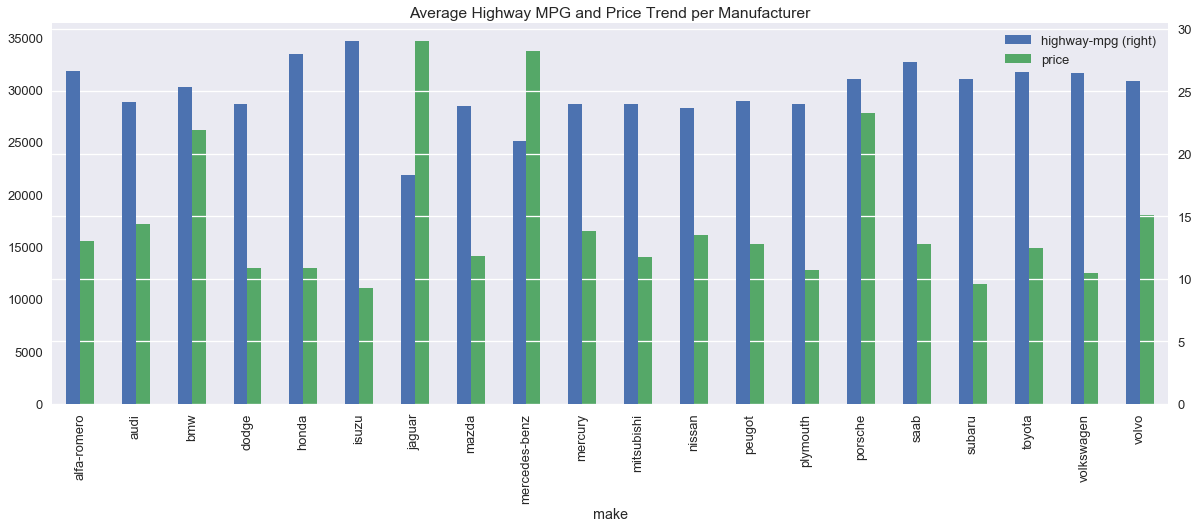

In [66]:
highest_mpg = auto_df[(auto_df['highway-mpg'] <= 30) & (auto_df['price'] >= 10595)]
high_mpg_price_trend = pd.pivot_table(highest_mpg, index=['make'], values=['highway-mpg','price'], aggfunc='mean')
print (high_mpg_price_trend)
high_mpg_price_trend.plot(kind="bar", figsize=(20,7), secondary_y="highway-mpg")
plt.title("Average Highway MPG and Price Trend per Manufacturer")

- What trend in price do we get to see when highway MPG is above 30 and Avg. price is less than 10595 USD (Considering 50% of Described data) ? 

Note: We've to consider MPG VS Price relation here again. We know that Price increases when highway/city MPG decreases. This gives us idea that high tier cars give lesser mileage. Keeping that thing in mind I had set the condition of 50% of described data ,i.e, Highway MPG above 30 and Price below 10595 USD.

We get to see that Chevrolet cars are likely to give us more MPG on an average of 46 while average price being on lower side,i.e, 6007 USD. This can be a Unique Selling Point of Chevrolet Cars. While Another interesting thing we could observe from the below graph is that Renault cars give avg. mileage of 31 MPG which is less than Chevrolet cars but Avg. Price stands at 9595 USD.

We can consider this Cars as Budget Oriented Cars.

            highway-mpg        price
make                                
chevrolet     46.333333  6007.000000
dodge         38.600000  6495.800000
honda         36.083333  7788.000000
mazda         34.875000  7470.000000
mitsubishi    35.500000  6987.333333
nissan        37.583333  7565.666667
plymouth      38.750000  6525.500000
renault       31.000000  9595.000000
subaru        32.875000  7787.000000
toyota        36.588235  7775.058824
volkswagen    38.285714  8560.714286


Text(0.5,1,'Average Highway MPG and Price Trend per Manufacturer')

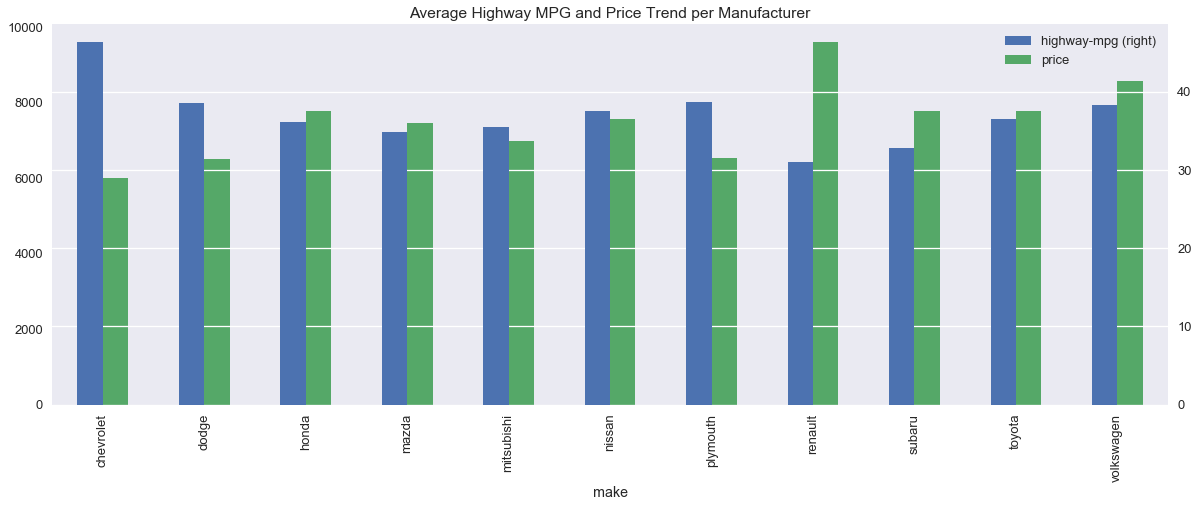

In [65]:
highest_mpg = auto_df[(auto_df['highway-mpg'] > 30) & (auto_df['price'] < 10595)]
high_mpg_price_trend = pd.pivot_table(highest_mpg, index=['make'], values=['highway-mpg','price'], aggfunc='mean')
print (high_mpg_price_trend)
high_mpg_price_trend.plot(kind="bar", figsize=(20,7), secondary_y="highway-mpg")
plt.title("Average Highway MPG and Price Trend per Manufacturer")

- How likely cars are falling in the Risk of being insured ? 

(+3 meaning there is a high risk of being Insured) 

From below graph we can see that we've more cars falling in 0 to 1 symboling meaning less likely of being Insured. While few cars fall in +3 symboling which mean very high risk of being Insured. Very less cars fall in -3 symboling which means those cars are quite on safer side.

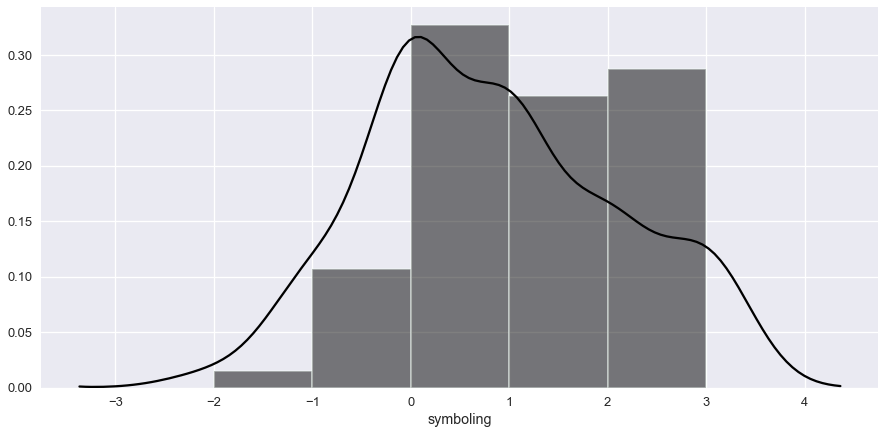

In [31]:
sns.set()
sns.set_context("talk")
plt.figure(figsize=(15,7))
sns.distplot(auto_df['symboling'], kde=True, bins=5, color='black', hist_kws=dict(edgecolor="mintcream", linewidth=1.5, alpha=0.5))

- How much is the Avg. loss Payment per car per year ?

We can observe that the loss is less if symboling is on negative side. (More likely when symboling is towards negative side)

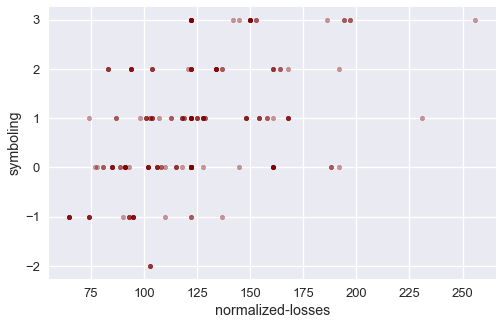

In [32]:
auto_df.plot(kind='scatter',x='normalized-losses', y='symboling', color="maroon", alpha=0.4, figsize=(8,5))

- How Curb weight of a car can affect on various other Features ?

Curb-weight is positively affecting Wheel base and Horsepower while negatively affecting MPG. MPG drops if curb weight increases.

We can also say that increase in horsepower can negatively Impact MPG which is most likely true in case of High tier cars. 

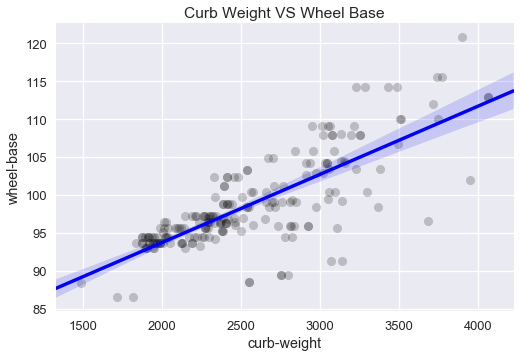

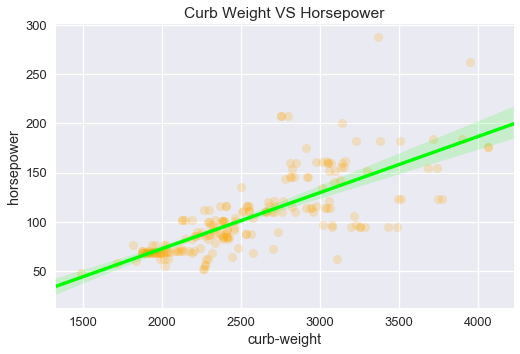

Text(0.5,1,'Curb Weight VS Highway MPG')

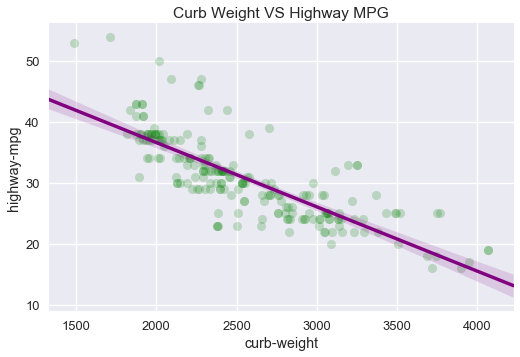

In [33]:
sns.lmplot(data=auto_df, x="curb-weight", y='wheel-base', aspect=1.5, line_kws={"color":"blue"}, scatter_kws={'color':"black", "alpha":0.2})
plt.title("Curb Weight VS Wheel Base")
plt.show()

sns.lmplot(data=auto_df, x="curb-weight", y='horsepower', aspect=1.5, line_kws={"color":"lime"}, scatter_kws={'color':"orange", "alpha":0.2})
plt.title("Curb Weight VS Horsepower")
plt.show()

sns.lmplot(data=auto_df, x="curb-weight", y='highway-mpg', aspect=1.5, line_kws={"color":"purple"}, scatter_kws={'color':"green", "alpha":0.2})
plt.title("Curb Weight VS Highway MPG")

- Does body style impacts Price ?

Yes, Convertible cars even if they are low-tier , their price is more than that of other body styles.

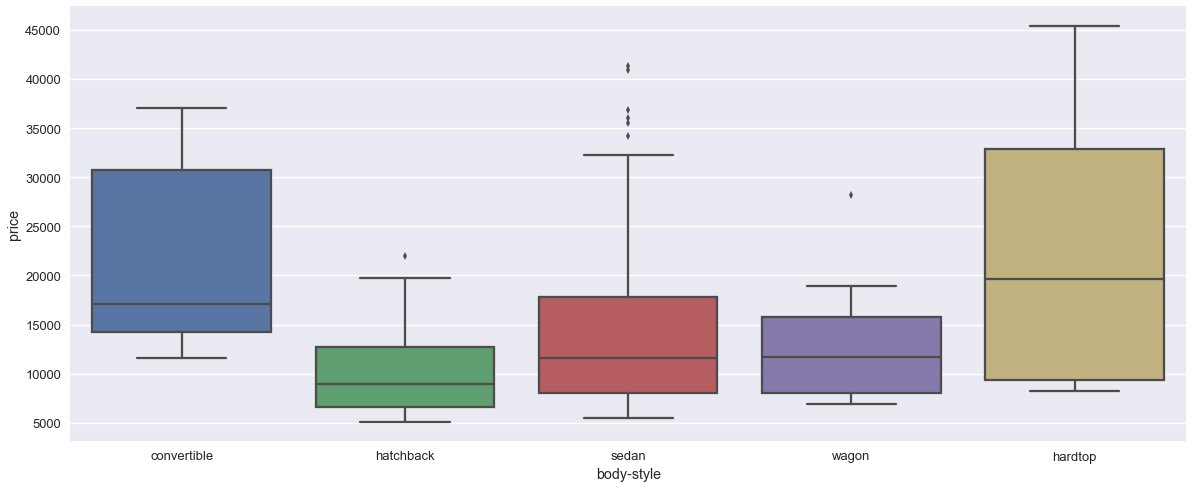

In [34]:
plt.figure(figsize=(20,8))
sns.boxplot(x="body-style", y="price", data=auto_df)

- How body style and number of doors impact on Losses ?

Cars with 2 doors are likely to bear more loss than 4 door cars.

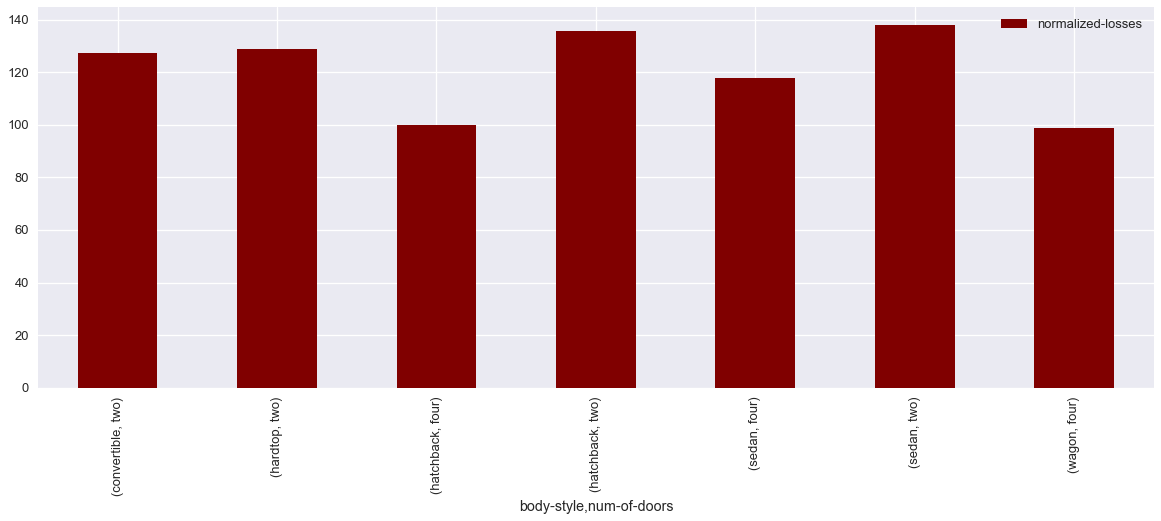

In [35]:
pd.pivot_table(auto_df, index=['body-style','num-of-doors'], values=['normalized-losses']).plot(kind="bar", figsize=(20,7), color="maroon")

- How can fuel-system affect Price ?

We cannot conclude much from this due to less amount of Data for SPFI and MFI. But let us consider MPFI and IDI are more expensive over other fuel systems in the dataset.

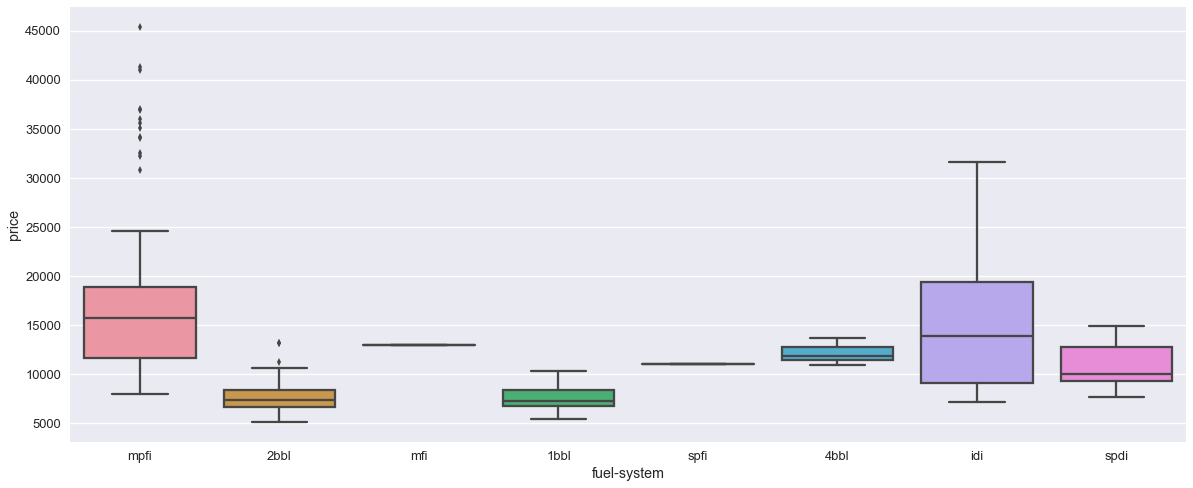

In [36]:
plt.figure(figsize=(20,8))
sns.boxplot(x="fuel-system", y="price", data=auto_df)

- Which "drive wheel" type affect Avg. MPG in a more poitive manner ?

Front wheel drive outputs more Mileage than 4WD and RWD.

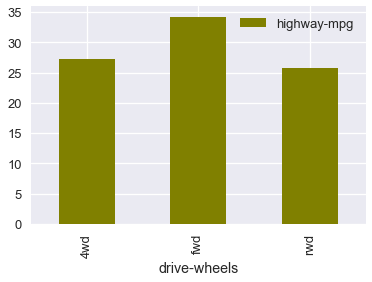

In [37]:
pd.pivot_table(auto_df, index=['drive-wheels'], values=['highway-mpg'], aggfunc="mean").plot(kind="bar", color="olive")

- How "drive wheel" type affect Price ?

So RWD cars are more costly than FWD and 4WD.

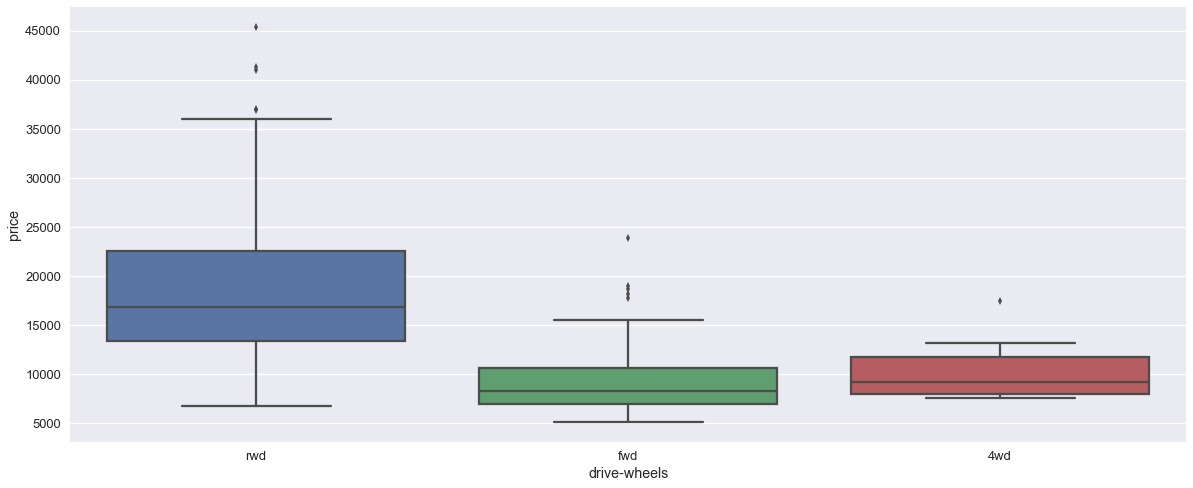

In [69]:
plt.figure(figsize=(20,8))
sns.boxplot(x="drive-wheels", y="price", data=auto_df)

- Which Manufacturer Car's are likely in a high risk of being Insured ?

Volvo cars are bearing low-risk of being Insured. While, Alfa-romero and Saab are carrying high risk of being Insured. 

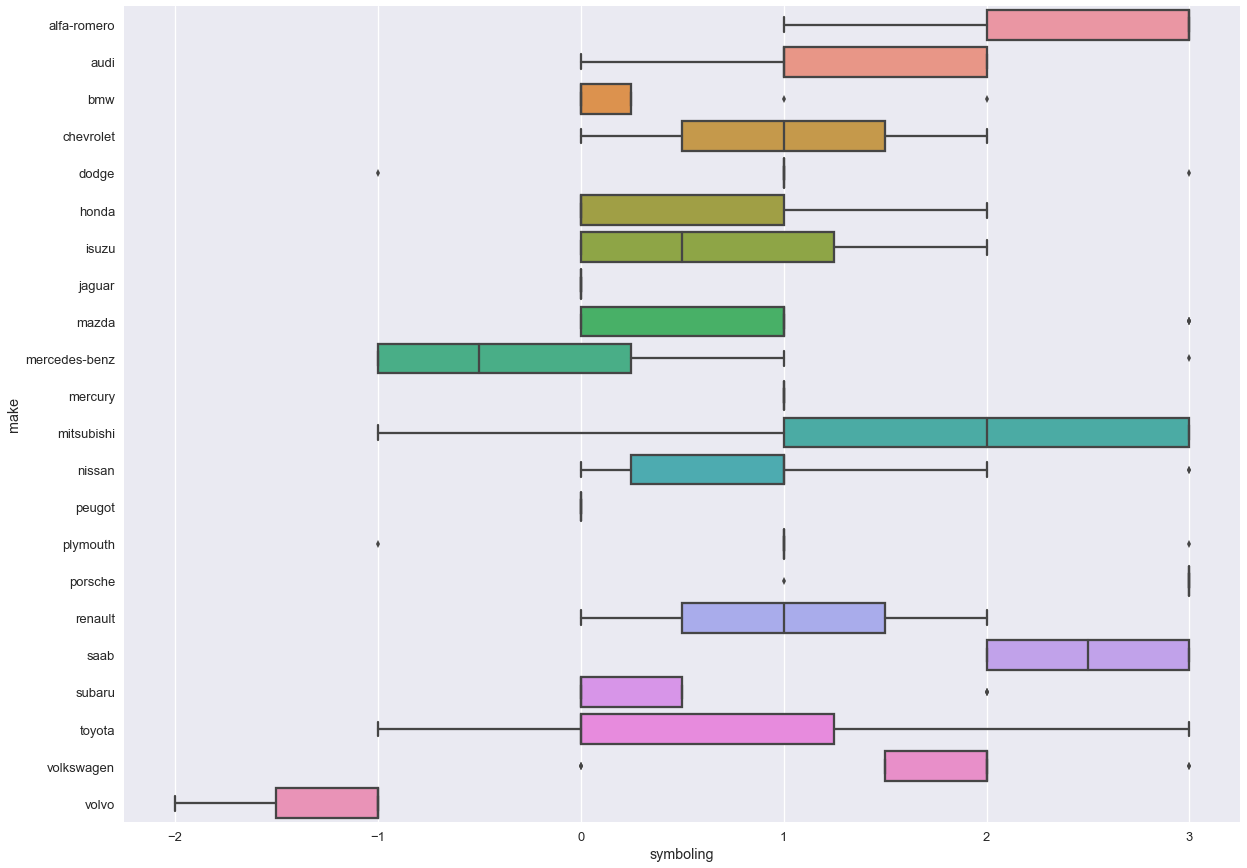

In [74]:
plt.figure(figsize=(20,15))
sns.boxplot(x="symboling", y="make", data=auto_df)

- Which manufacturer cars are high tier/costly ? (Dataset respective) 

Mercedes-benz and Jaguar cars are more costly, followed by BMW and Porsche.

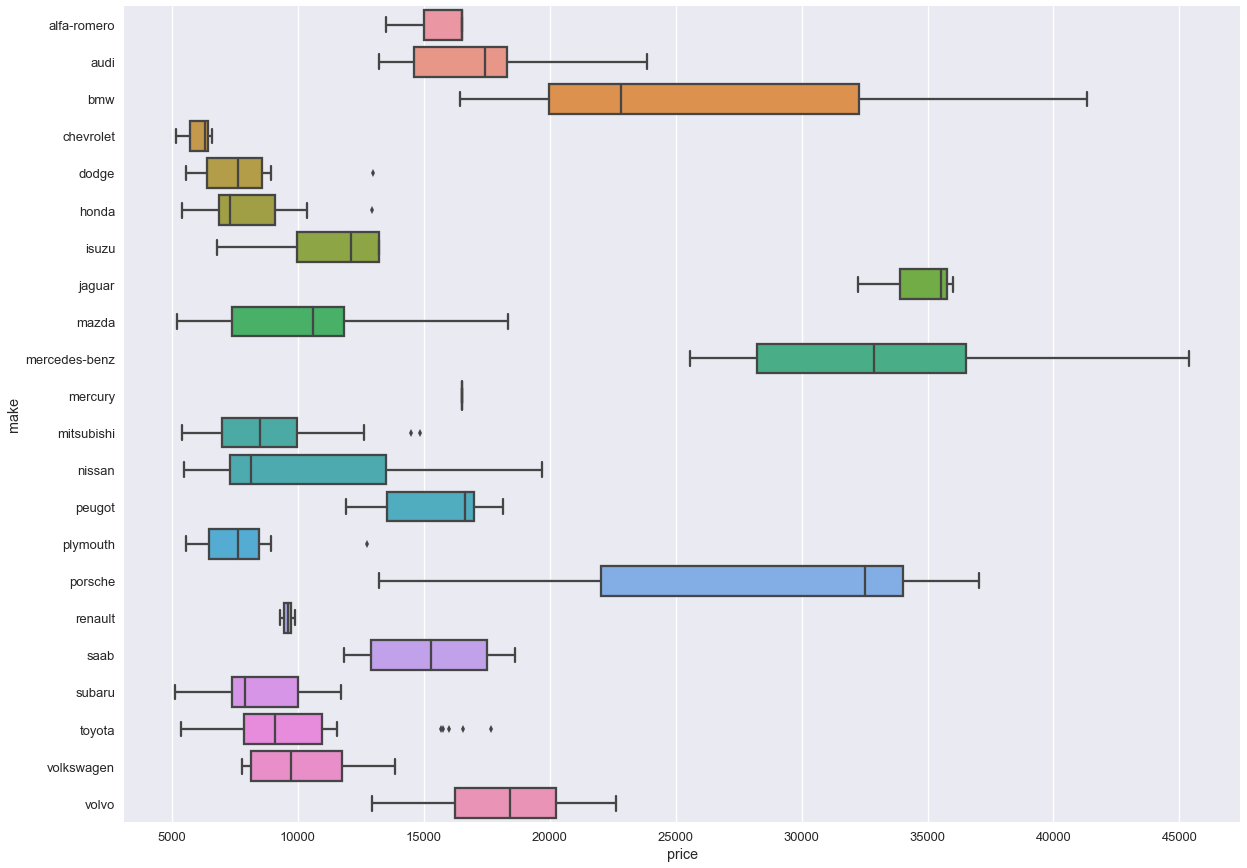

In [70]:
plt.figure(figsize=(20,15))
sns.boxplot(x="price", y="make", data=auto_df)

Inference:

- Found Various Features which affect Price
- Found those manufacturers which carry high risk of being Insured
- Found Average Highway MPG and Price Trend per Manufacturer
- Found how "drive-wheels" type affect the MPG (City/Highway)
- Found trend in Symboling and Normalised Loses